# 3rd place - Data Science Academy Competition in Machine Learning - Month: March/2019



### Created by: Andrio Corrêa

### Contact-me: andrio.rodrigo.silva@hotmail.com

In [1]:
#Importing important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
#Loading data
stores = pd.read_csv("datasets/lojas.csv")
df_a = pd.read_csv("datasets/dataset_treino_1.csv")
df_b = pd.read_csv("datasets/dataset_treino_2.csv")
stores_train_data = pd.concat([df_a, df_b])
stores_test_data = pd.read_csv("datasets/dataset_teste.csv")
stores_y_train_data = stores_train_data['Sales']

/home/andrio/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Knowing Dataset Attributes

- __ID__ - an ID representing a tuple (Store, Date) within the dataset
- __Store__ - a unique ID for each store
- __Sales__ - the sales volume of a given day (this is what you are predicting)
- __Customers__ - the number of customers on a given day
- __Open__ - an indicator for whether the store was open: 0 = closed, 1 = open
- __StateHoliday__ - indicates a state holiday. Normally, all stores, with few exceptions, are closed on state holidays. Please note that all schools are closed on holidays and weekends. a = public holiday, b = easter holiday, c = christmas, 0 = none
- __SchoolHoliday__ - indicates whether (Store, Date) was affected by the closure of public schools
- __StoreType__ - differentiates between 4 different store models: a, b, c, d
- __Assortment__ - describes a level: a = basic, b = extra, c = extended
- __CompetitionDistance__ - distance in meters to nearest store closest competitor
- __CompetitionOpenSince[Month/Year]__ - indicates the approximate year and month of the time the closest competitor was opened
- __Promo__ - indicates whether a store is running a promotion on that day
- __Promo2__ - continuous and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- __Promo2Since[Year/Week]__ - describes the calendar year and week in which the store started participating in Promo2
- __PromoInterval__ - describes the consecutive intervals that Promo2 starts, indicating the months in which the promotion is started again. For example. "Feb, May, Aug, Nov" means that each round starts in February, May, August, November of any year for that store.

# Introduction

Solar is a network of drug stores that operates with more than 3,000 establishments in 7 countries. Currently, managers at each Solar Drug Store have the task of forecasting their daily sales up to six weeks in advance.

In-store sales are influenced by a number of factors, including promotions, competitors, school and state holidays, seasonality, and location. With thousands of managers predicting sales based on their unique circumstances, the accuracy of the results can be quite varied.

### Aim

It will first be necessary to clean the dataset data, this includes removing columns with multiple null data or even rows, replacing this data may also be another solution.

The main objective of this challenge is to be able to select the best attributes that can serve as the basis for achieving a prediction related to the daily sales volume. The manager knows the sales volume of a day with up to 6 weeks in advance.

# Exploratory Data Analysis

In [3]:
#Stores data
stores[:10]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [4]:
#Data from Stores Train
stores_train_data[:10]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [5]:
#Data from Target
stores_y_train_data[:10]

0     5263
1     6064
2     8314
3    13995
4     4822
5     5651
6    15344
7     8492
8     8565
9     7185
Name: Sales, dtype: int64

In [6]:
#Quantity of rows
qtd_rows = len(stores_train_data)
print(qtd_rows)

1017209


In [7]:
#In the description of the problem it is described that sales are influenced by promotions
#competitors, school and state holidays, seasonality and locality, this way
#we can then assign new attributes of the store data set
#these new attributes have been added through the ID parameter, each store has a unique ID.
for x in range(0,len(stores)):
    stores_train_data.loc[stores_train_data['Store'] == x+1, 'StoreType'] = stores.iloc[x,1]   
    stores_train_data.loc[stores_train_data['Store'] == x+1, 'Assortment'] = stores.iloc[x,2]   
    stores_train_data.loc[stores_train_data['Store'] == x+1, 'CompetitionDistance'] = stores.iloc[x,3]   
    stores_train_data.loc[stores_train_data['Store'] == x+1, 'CompetitionOpenSinceMonth'] = stores.iloc[x,4]   
    stores_train_data.loc[stores_train_data['Store'] == x+1, 'CompetitionOpenSinceYear'] = stores.iloc[x,5]   
    stores_train_data.loc[stores_train_data['Store'] == x+1, 'Promo2'] = stores.iloc[x,6]
    if (x % 50 == 0):
        print(x)
print("Complete!")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
Complete!


In [8]:
#The same process done previously is done for the Test Store data set, since they must have the
#same number of attributes
for x in range(0,len(stores)):
    stores_test_data.loc[stores_test_data['Store'] == x+1, 'StoreType'] = stores.iloc[x,1]   
    stores_test_data.loc[stores_test_data['Store'] == x+1, 'Assortment'] = stores.iloc[x,2]   
    stores_test_data.loc[stores_test_data['Store'] == x+1, 'CompetitionDistance'] = stores.iloc[x,3]   
    stores_test_data.loc[stores_test_data['Store'] == x+1, 'CompetitionOpenSinceMonth'] = stores.iloc[x,4]   
    stores_test_data.loc[stores_test_data['Store'] == x+1, 'CompetitionOpenSinceYear'] = stores.iloc[x,5]   
    stores_test_data.loc[stores_test_data['Store'] == x+1, 'Promo2'] = stores.iloc[x,6]
    if (x % 50 == 0):
        print(x)
print("Complete!")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
Complete!


In [9]:
#Checking out the new data set for Train Data
stores_train_data[:3]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1.0


In [10]:
#Checking out the new data set for Test Data
stores_test_data[:3]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1.0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0.0


### Checking out the data

In [11]:
#Columns from Train Data
stores_train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

In [12]:
#Columns from Test Data
stores_test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

In [13]:
#Data description - Train Data
stores_train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,7.715324e+03,3.211832,5.992644,4.999999e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00


We have 15 columns in the Train Data (Test has 14, does not have Customers), but only 10 have been parsed by the describe() function. Some columns are in 'character' format, this should be resolved by removing or converting these columns to numeric format.

The columns __Date__, __StateHoliday__, __StoreType__, __Assortment__ were not analyzed. Below we will check which format of the value these columns store.

In [14]:
#Number of rows from Train Data
len(stores_train_data)

1017209

The Train Data has 1.017.209 rows.

In [15]:
#Checking the amount of missing values for each attribute (column) in the Train Data
stores_train_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
dtype: int64

We have that __CompetitionDistance__, __CompetitionOpenSinceMonth__ e __CompetitionOpenSinceYear__ 
have some null values, this should be resolved since some Machine Learning algorithms do not tolerate null values.

We will fill these null values by mode, some prefer the mean and others the median, but here I will choose mode. Mode is the value that most often appears in a set of data. __Important__, the mode that will be chosen is for each attribute and not the whole set.

In [16]:
#Replacing null values by mode
stores_train_data['CompetitionDistance'].fillna(stores_train_data.CompetitionDistance.mode()[0], inplace=True)
stores_train_data['CompetitionOpenSinceMonth'].fillna(stores_train_data.CompetitionOpenSinceMonth.mode()[0], inplace=True)
stores_train_data['CompetitionOpenSinceYear'].fillna(stores_train_data.CompetitionOpenSinceYear.mode()[0], inplace=True)

In [17]:
#Checking the amount of missing values for each attribute (column) in the Train Data - Again
stores_train_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [18]:
#Checking out the Test Data
stores_test_data.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
dtype: int64

In the test data set we have 4 attributes with null values: __Open__, __CompetitionDistance__, __CompetitionOpenSinceMonth__ and __CompetitionOpenSinceYear__. Let's use the same method, replacing these values by mode.

In [19]:
#Replacing null values by mode in Test Data
stores_test_data['Open'].fillna(stores_test_data.Open.mode()[0], inplace=True)
stores_test_data['CompetitionDistance'].fillna(stores_test_data.CompetitionDistance.mode()[0], inplace=True)
stores_test_data['CompetitionOpenSinceMonth'].fillna(stores_test_data.CompetitionOpenSinceMonth.mode()[0], inplace=True)
stores_test_data['CompetitionOpenSinceYear'].fillna(stores_test_data.CompetitionOpenSinceYear.mode()[0], inplace=True)

In [20]:
#Checking the amount of missing values for each attribute (column) in the Test Data
stores_test_data.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

We no longer have missing values.

In [21]:
#Checking out the types - Train Data
stores_train_data.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                 object
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                       float64
dtype: object

In [22]:
#Checking out the types - Train Data
stores_test_data.dtypes

Id                             int64
Store                          int64
DayOfWeek                      int64
Date                          object
Open                         float64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                       float64
dtype: object

We need to convert the object type to numerical type. We going to this later.

### Handling the dates

It can be seen in the dataset that we have dates, these dates can be divided into Year, Month and Day. They can represent values for our prediction considering that the volume of sales done at the beginning of the year is different for the volume made in the middle of the year and even than at the end of the year (Christmas, for example).

These values represent something, let's separate them and keep them for our tests.

In [23]:
#Separating the Date column into three new columns (Year, Month, and Day)
#Separating for Train Data
stores_train_data["Year"] = [x.split('-')[0] for x in stores_train_data.Date]
stores_train_data["Year"] = stores_train_data["Year"].astype(float)

stores_train_data["Month"] = [x.split('-')[1] for x in stores_train_data.Date]
stores_train_data["Month"] = stores_train_data["Month"].astype(float)

stores_train_data["Day"] = [x.split('-')[2] for x in stores_train_data.Date]
stores_train_data["Day"] = stores_train_data["Day"].astype(float)


#Separating for Test Data
stores_test_data["Year"] = [x.split('-')[0] for x in stores_test_data.Date]
stores_test_data["Year"] = stores_test_data["Year"].astype(float)

stores_test_data["Month"] = [x.split('-')[1] for x in stores_test_data.Date]
stores_test_data["Month"] = stores_test_data["Month"].astype(float)

stores_test_data["Day"] = [x.split('-')[2] for x in stores_test_data.Date]
stores_test_data["Day"] = stores_test_data["Day"].astype(float)

In [24]:
#Checking out the first rows for Train Data
stores_train_data[:3]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0.0,2015.0,7.0,31.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1.0,2015.0,7.0,31.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1.0,2015.0,7.0,31.0


In [25]:
#Checking out the first rows for Test Data
stores_test_data[:3]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0.0,2015.0,9.0,17.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1.0,2015.0,9.0,17.0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0.0,2015.0,9.0,17.0


It looks great!!!

Later we will drop the Date column.

### Plotting some graphics

In [26]:
#Let's check the relationship between DayOfWeek and Sales
#Before, I must separate the days of the week into unique values
days_of_week = stores_train_data['DayOfWeek'].unique()
days_of_week

array([5, 4, 3, 2, 1, 7, 6])

In [27]:
#For each day of the week I make the sum of the total sales volume
sales_by_week_day = {}
for x in days_of_week:
    selected_row = stores_train_data.loc[stores_train_data["DayOfWeek"] == x, "Sales"].sum().astype(float)    
    sales_by_week_day[x] = selected_row    

In [28]:
#Values (should be organized by day of the week)
sales_by_week_day

{5: 980555941.0,
 4: 911177709.0,
 3: 954962863.0,
 2: 1020411930.0,
 1: 1130203012.0,
 7: 29551433.0,
 6: 846317735.0}

In [29]:
#Values are organized by the days of the week, which are the dictionary keys
tuple_days_of_week_sales = sorted(sales_by_week_day.items())

In [30]:
#Much better now
tuple_days_of_week_sales

[(1, 1130203012.0),
 (2, 1020411930.0),
 (3, 954962863.0),
 (4, 911177709.0),
 (5, 980555941.0),
 (6, 846317735.0),
 (7, 29551433.0)]

In [31]:
#The data are separated for plotting
axis_days_of_week, axis_sales = zip(*tuple_days_of_week_sales) 

(array([-2.0e+08,  0.0e+00,  2.0e+08,  4.0e+08,  6.0e+08,  8.0e+08,
         1.0e+09,  1.2e+09]), <a list of 8 Text yticklabel objects>)

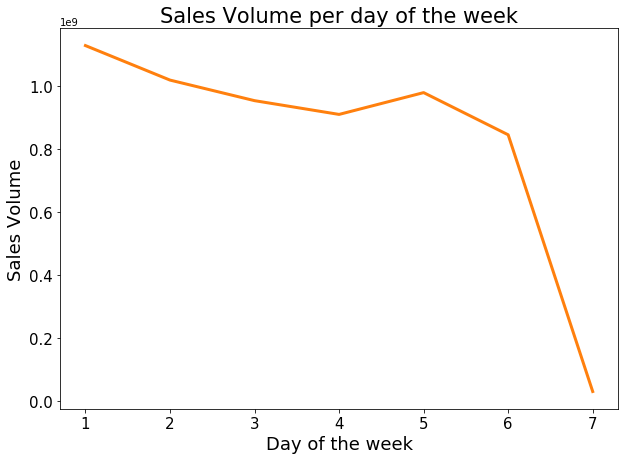

In [32]:
#Simple plot
plt.figure(figsize=(10,7))

#Color for colorblind people
color_new = (255/255, 128/255, 14/255)
plt.plot(axis_days_of_week,axis_sales, c=color_new, linewidth=3)
plt.title('Sales Volume per day of the week', fontsize=21)
plt.xlabel('Day of the week', fontsize=18)
plt.ylabel('Sales Volume', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

From the chart above you can see that there is a drop in sales volume as the week goes by. With 1 being a Monday, on Wednesday the volume reaches a low, on Thursday there is a slight rise, but on Friday and the weekend sales fall.

Now we know that day of the week is an important variable.

In [33]:
#Let's check the relation between the days of the week with the number of customers
customers_by_week_day = {}
for x in days_of_week:
    selected_row = stores_train_data.loc[stores_train_data["DayOfWeek"] == x, "Customers"].sum().astype(float)    
    customers_by_week_day[x] = selected_row    

In [34]:
#Values (should be organized by day of the week)
customers_by_week_day

{5: 108384820.0,
 4: 101732938.0,
 3: 105117642.0,
 2: 110848063.0,
 1: 117675012.0,
 7: 5179426.0,
 6: 95103854.0}

In [35]:
#Values are organized by the days of the week, which are the dictionary keys
tuple_days_of_week_customers = sorted(customers_by_week_day.items())

In [36]:
#Much better now
tuple_days_of_week_customers

[(1, 117675012.0),
 (2, 110848063.0),
 (3, 105117642.0),
 (4, 101732938.0),
 (5, 108384820.0),
 (6, 95103854.0),
 (7, 5179426.0)]

In [37]:
#The data are separated for plotting
axis_days_of_week_customers, axis_customers = zip(*tuple_days_of_week_sales) 

(array([-2.0e+08,  0.0e+00,  2.0e+08,  4.0e+08,  6.0e+08,  8.0e+08,
         1.0e+09,  1.2e+09]), <a list of 8 Text yticklabel objects>)

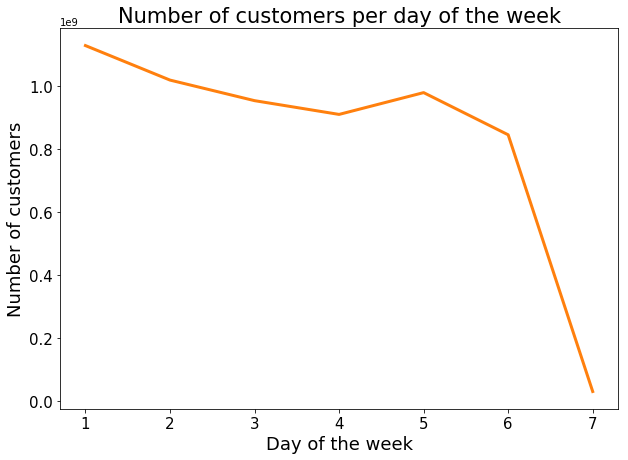

In [38]:
#Simple plot
plt.figure(figsize=(10,7))

#Color for colorblind people
color_new = (255/255, 128/255, 14/255)
plt.plot(axis_days_of_week_customers, axis_customers, c=color_new, linewidth=3)
plt.title('Number of customers per day of the week', fontsize=21)
plt.xlabel('Day of the week', fontsize=18)
plt.ylabel('Number of customers', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

The two graphs generated are very similar, this shows the strong relationship between the number of sales and the number of customers, quite obvious information, but it is still interesting to show.

Unfortunately this attribute is not found in the test dataset, the problem would be solved more easily.

In [39]:
#Let's check the ratio of the number of sales to stores that do promotion and stores that do not
stores_promo_or_not = {}
for x in range(0,2):
    selected_row = stores_train_data.loc[stores_train_data["Promo"] == x, "Sales"].sum().astype(float)    
    stores_promo_or_not[x] = selected_row  
    
stores_promo_or_not    

{0: 2771974337.0, 1: 3101206286.0}

In [40]:
tuple_promo_or_not = sorted(stores_promo_or_not.items())
tuple_promo_or_not

[(0, 2771974337.0), (1, 3101206286.0)]

In [41]:
#The data are separated for plotting
axis_promo_or_not, axis_sales_promo_or_not = zip(*tuple_promo_or_not) 

(array([0.0e+00, 5.0e+08, 1.0e+09, 1.5e+09, 2.0e+09, 2.5e+09, 3.0e+09,
        3.5e+09]), <a list of 8 Text yticklabel objects>)

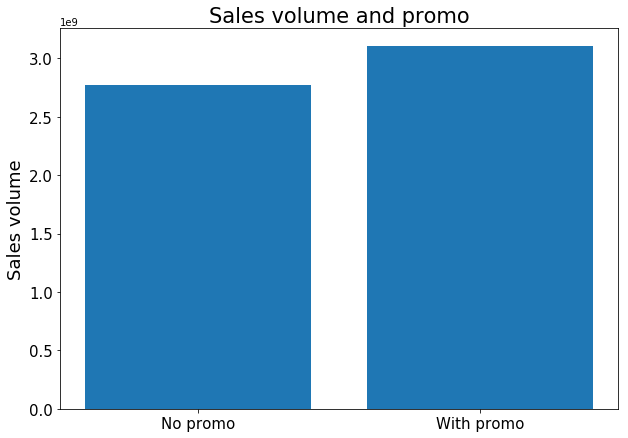

In [42]:
#Simple plot
plt.figure(figsize=(10,7))

#Color for colorblind people
color_new = (255/255, 128/255, 14/255)

plt.bar(axis_promo_or_not, axis_sales_promo_or_not)
plt.xticks(axis_promo_or_not, ['No promo', 'With promo'])
plt.title('Sales volume and promo', fontsize=21)
plt.ylabel('Sales volume', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

By the bar graph it is clear that the promotions end up helping in the profit of the store.

# Changing columns from String to Numeric

To deliver our dataset (Train Data and Test Data) to the Machine Learning algorithm, we need all the data to be numeric, so we must convert __StoreType__, __Assortment__, __StateHoliday__ and __SchoolHoliday__.

Let's use LabelEnconder from sklearn.

In [43]:
#Unique values for transformation - StoreType
print(sorted(pd.Series(stores_train_data["StoreType"]).unique()))

['a', 'b', 'c', 'd']


In [44]:
#Unique values for transformation - Assortment
print(sorted(pd.Series(stores_train_data["Assortment"]).unique()))

['a', 'b', 'c']


In [45]:
#StoreType - Before - Store Train Data
stores_train_data["StoreType"][:5]

0    c
1    a
2    a
3    c
4    a
Name: StoreType, dtype: object

In [46]:
#StoreType - Before - Store Test Data
stores_test_data["StoreType"][:5]

0    c
1    a
2    a
3    a
4    a
Name: StoreType, dtype: object

In [47]:
#Assortment - Before - Store Train Data
stores_train_data["Assortment"][:5]

0    a
1    a
2    a
3    c
4    a
Name: Assortment, dtype: object

In [48]:
#Assortment - Before - Store Test Data
stores_test_data["Assortment"][:5]

0    a
1    a
2    c
3    a
4    c
Name: Assortment, dtype: object

In [49]:
#Using LabelEncoder
label_encoder = LabelEncoder()

#Store Train Data
stores_train_data["StoreType"] = label_encoder.fit_transform(stores_train_data["StoreType"])
stores_train_data["Assortment"] = label_encoder.fit_transform(stores_train_data["Assortment"])

#Store Test Data
stores_test_data["StoreType"] = label_encoder.fit_transform(stores_test_data["StoreType"])
stores_test_data["Assortment"] = label_encoder.fit_transform(stores_test_data["Assortment"])

In [50]:
#StoreType - After - Store Train Data
stores_train_data["StoreType"][:5]

0    2
1    0
2    0
3    2
4    0
Name: StoreType, dtype: int64

In [51]:
#Assortment - After - Store Test Data
stores_test_data["StoreType"][:5]

0    2
1    0
2    0
3    0
4    0
Name: StoreType, dtype: int64

In [52]:
#Assortment - After - Store Train Data
stores_train_data["Assortment"][:5]

0    0
1    0
2    0
3    2
4    0
Name: Assortment, dtype: int64

In [53]:
#Assortment - After - Store Test Data
stores_test_data["Assortment"][:5]

0    0
1    0
2    2
3    0
4    2
Name: Assortment, dtype: int64

For StateHoliday and SchoolHoliday we have to do manually.

In [54]:
#Unique values for transformation - Train Data - StateHoliday
print(pd.Series(stores_train_data["StateHoliday"]).unique())

['0' 'a' 'b' 'c' 0 '"0"' '"a"' '"c"' '"b"']


In [55]:
#Unique values for transformation - Test Data - StateHoliday
print(pd.Series(stores_test_data["StateHoliday"]).unique())

['0' 'a']


In [56]:
#Unique values for transformation - Train Data - SchoolHoliday
print(pd.Series(stores_train_data["SchoolHoliday"]).unique())

[1 0 '"0"' '"1"']


In [57]:
#Unique values for transformation - Test Data - SchoolHoliday
print(pd.Series(stores_test_data["SchoolHoliday"]).unique())

[0 1]


In [58]:
#Replacing for StateHoliday - Train Data
stores_train_data.loc[stores_train_data["StateHoliday"] == '0', "StateHoliday"] = 0
stores_train_data.loc[stores_train_data["StateHoliday"] == 'a', "StateHoliday"] = 1
stores_train_data.loc[stores_train_data["StateHoliday"] == 'b', "StateHoliday"] = 2
stores_train_data.loc[stores_train_data["StateHoliday"] == 'c', "StateHoliday"] = 3
stores_train_data.loc[stores_train_data["StateHoliday"] == '"0"', "StateHoliday"] = 0
stores_train_data.loc[stores_train_data["StateHoliday"] == '"a"', "StateHoliday"] = 1
stores_train_data.loc[stores_train_data["StateHoliday"] ==  '"b"', "StateHoliday"] = 2
stores_train_data.loc[stores_train_data["StateHoliday"] == '"c"', "StateHoliday"] = 3

#Replacing for StateHoliday - Test Data
stores_test_data.loc[stores_test_data["StateHoliday"] == '0', "StateHoliday"] = 0
stores_test_data.loc[stores_test_data["StateHoliday"] == 'a', "StateHoliday"] = 1

In [59]:
#Replacing for SchoolHoliday - Train Data
stores_train_data.loc[stores_train_data["SchoolHoliday"] == '"0"', "SchoolHoliday"] = 0
stores_train_data.loc[stores_train_data["SchoolHoliday"] == '"1"', "SchoolHoliday"] = 1

In [60]:
#Unique values for transformation - Train Data - StateHoliday
print(pd.Series(stores_train_data["StateHoliday"]).unique())

[0 1 2 3]


In [61]:
#Unique values for transformation - Test Data - StateHoliday
print(pd.Series(stores_test_data["StateHoliday"]).unique())

[0 1]


In [62]:
#Unique values for transformation - Train Data - SchoolHoliday
print(pd.Series(stores_train_data["SchoolHoliday"]).unique())

[1 0]


In [63]:
#Unique values for transformation - Test Data - SchoolHoliday
print(pd.Series(stores_test_data["SchoolHoliday"]).unique())

[0 1]


### Correlation between the data

In [64]:
#Finnaly, we will verify the correlation between the data
corr = stores_train_data.corr()
corr

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Year,Month,Day
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000362,0.000641,-0.021604,0.004419,-0.026483,-0.037472,-0.000224,0.008488,0.000290,0.001467,0.000023
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.044265,-0.205388,0.000051,-0.000052,-0.000025,0.000003,-0.000022,0.000168,0.001937,-0.005362,0.005136
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,-0.229029,0.085124,-0.013057,0.074941,-0.018637,-0.023226,0.008740,-0.091040,0.023519,0.048768,-0.011612
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,-0.204295,0.071568,-0.141423,0.007044,-0.102060,-0.024093,0.006541,-0.150159,-0.001212,0.038179,-0.004473
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,-0.340893,0.086171,-0.003325,0.002972,0.007989,0.001436,0.002557,-0.008309,-0.001009,-0.000681,0.033428
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,-0.024157,0.067483,-0.000299,0.000294,0.000141,-0.000008,0.000130,-0.000983,0.024300,-0.011747,-0.108325
StateHoliday,0.000362,-0.044265,-0.229029,-0.204295,-0.340893,-0.024157,1.000000,0.196424,0.001360,-0.001497,-0.000400,0.000789,-0.001396,0.004839,-0.005067,0.038058,-0.015652
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,0.196424,1.000000,0.000032,-0.002530,-0.003653,0.000124,0.001841,-0.006909,-0.036535,0.103282,0.030538
StoreType,-0.021604,0.000051,-0.013057,-0.141423,-0.003325,-0.000299,0.001360,0.000032,1.000000,0.232862,0.077105,0.040474,0.043591,0.088922,-0.001514,-0.007692,-0.000109
Assortment,0.004419,-0.000052,0.074941,0.007044,0.002972,0.000294,-0.001497,-0.002530,0.232862,1.000000,0.146684,0.035876,0.092591,0.008220,0.001494,0.007601,0.000104


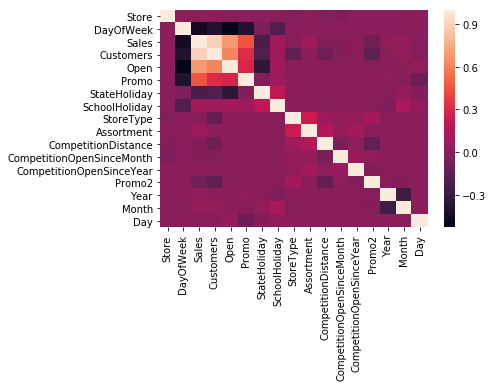

In [65]:
#Heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [66]:
#Checking the attributes with strong correlations in relation to Sales
cor_target = abs(corr['Sales'])

relevant = sorted(cor_target[cor_target > 0.01], reverse=True)
relevant

[1.0,
 0.8947107733008401,
 0.6784723460132743,
 0.46212502322577687,
 0.45234471982674274,
 0.2290290264607052,
 0.09103964725759131,
 0.08512403767671553,
 0.07494074865011639,
 0.04876761995467207,
 0.023519242543125533,
 0.023225715809986405,
 0.01863743278565422,
 0.01305709648484712,
 0.011611875285159643]

In [67]:
#Showing attributes greater than 0.01
#This value was an arbitrary choice

relevant_text = cor_target[cor_target > 0.01]
relevant_text

DayOfWeek                    0.462125
Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
StateHoliday                 0.229029
SchoolHoliday                0.085124
StoreType                    0.013057
Assortment                   0.074941
CompetitionDistance          0.018637
CompetitionOpenSinceMonth    0.023226
Promo2                       0.091040
Year                         0.023519
Month                        0.048768
Day                          0.011612
Name: Sales, dtype: float64

These are the attributes selected for our tests:

- __DayOfWeek__ 

- __Open__ 

- __Promo__ 

- __StateHoliday__

- __StoreType__

- __Assortment__

- __CompetitionDistance__

- __CompetitionOpenSinceMonth__

- __CompetitionOpenSinceYear__

- __Promo2__ 

### Dropping columns

We see that there are still columns that we do not need, like __Date__, __Sales__ e __Customers__ for Train Data and __Date__ e __Id__ for Test Data. We must remove them.

In [68]:
#Dropping columns Train Data
stores_train_data.drop(['Date', 'Sales', 'Customers'], axis=1, inplace=True)

In [69]:
#Checking
stores_train_data[:3]

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Year,Month,Day
0,1,5,1,1,0,1,2,0,1270.0,9.0,2008.0,0.0,2015.0,7.0,31.0
1,2,5,1,1,0,1,0,0,570.0,11.0,2007.0,1.0,2015.0,7.0,31.0
2,3,5,1,1,0,1,0,0,14130.0,12.0,2006.0,1.0,2015.0,7.0,31.0


In [70]:
#Dropping columns for Test Data
stores_test_data.drop(['Date', 'Id'], axis=1, inplace=True)

In [71]:
#Checking
stores_test_data[:3]

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Year,Month,Day
0,1,4,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0.0,2015.0,9.0,17.0
1,3,4,1.0,1,0,0,0,0,14130.0,12.0,2006.0,1.0,2015.0,9.0,17.0
2,7,4,1.0,1,0,0,0,2,24000.0,4.0,2013.0,0.0,2015.0,9.0,17.0


In [72]:
#Checking columns
print('Train:', len(stores_train_data.columns))
print('Test:', len(stores_test_data.columns))

Train: 15
Test: 15


In [73]:
#I make one last check if the Train columns match Test columns
pd.unique(stores_train_data.columns == stores_test_data.columns)

array([ True])

Confirmed!

Now we can move on to the algorithm tests.

# Testing Machine Learning Algorithms

There is simply no algorithm that can solve all prediction problems.

I will use 4:

- Regression Tree;

- Random Forest;

- GBoost;

- XGBoost;

Although it is recommended, I will not use evaluation methods like K-Fold and Leave-One-Out.

In [74]:
#The features
cols_features = ['DayOfWeek','Open','Promo','StateHoliday','StoreType','Assortment','CompetitionDistance',
                 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                 'Promo2']

In [75]:
#Number of features
len(cols_features)

10

In [76]:
#Store the position of the columns present in the Train dataset
list_colums_stores_train_data = [stores_train_data.columns.get_loc(c) for c in cols_features if c in stores_train_data]

In [77]:
#Separating the columns for Training
store_train_data_values = stores_train_data.iloc[:,list_colums_stores_train_data].values

#It was defined at the beginning
y_train_data = stores_y_train_data.values

In [78]:
#Store the position of the columns present in the Test dataset
list_colums_stores_test_data = [stores_test_data.columns.get_loc(c) for c in cols_features if c in stores_test_data]

In [79]:
#I store the values of the columns that were located through the index. The index was stored in the
#previous step
store_test_data_values = stores_test_data.iloc[:,list_colums_stores_test_data].values

In [80]:
#Saving the new dataset
save_train_data = pd.DataFrame(store_train_data_values)
save_train_data.columns=cols_features

save_test_data = pd.DataFrame(store_test_data_values)
save_test_data.columns=cols_features

save_y_train_data = pd.DataFrame(y_train_data)
save_y_train_data.columns=['y_train']

save_train_data.to_csv('datasets/train_data.csv', index=False)
save_test_data.to_csv('datasets/test_data.csv', index=False)
save_y_train_data.to_csv('datasets/y_train_data.csv', index=False)

In [81]:
#Loading the new dataset
train_data_new = pd.read_csv('datasets/train_data.csv', header=0)
test_data_new = pd.read_csv('datasets/test_data.csv', header=0)
y_train_data_new = pd.read_csv('datasets/y_train_data.csv', index_col=False).values

#From Array of arrays to only array
y_train_data_new = y_train_data_new.reshape(-1)

### Division of data in Test and Training

In [82]:
#Module Sklearn to separate into Test and Training
from sklearn.model_selection import train_test_split

#Data Split for Training, Testing, and Validation
n = random.randrange(45,90)
X_train, X_test, y_train, y_test = train_test_split(train_data_new.values, y_train_data_new, test_size=0.2, random_state=n)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=n)

In [83]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(610325, 10) (610325,)
(203442, 10) (203442,)
(203442, 10) (203442,)


### Evaluation equation (metric)

In [84]:
def calc_rmsep(y, y_pred):
    rmsep = np.sqrt(np.mean(np.square(((y - y_pred) / y_pred)), axis=0))  
    return rmsep

## Decision Tree Regression

In [85]:
#Main module for DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [86]:
#Instantiating the DecisioTree object
decisionTree_regressor = DecisionTreeRegressor(random_state = 0)

In [87]:
#Training
decisionTree_regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [88]:
#Checking Score
decisionTree_regressor.score(X_val, y_val)

0.910970626576521

In [89]:
#Prediction for X_test
y_pred_decision_tree = decisionTree_regressor.predict(X_val)

In [90]:
y_pred_decision_tree

array([ 9339.26436782, 10051.70454545,     0.        , ...,
        9233.14285714,  3003.68965517,  7218.40425532])

In [91]:
#Changing rows with zero values
y_pred_decision_tree[y_pred_decision_tree == 0] = 0.0001

In [92]:
#Evaluation
calc_rmsep(y_val, y_pred_decision_tree)

0.44428143210608384

In [93]:
#Prediction for the data test <- stores_test_data
y_pred_decision_tree_teste = decisionTree_regressor.predict(test_data_new.values)

In [94]:
y_pred_decision_tree_teste[:10]

array([4882.35135135, 8073.97619048, 9333.30434783, 7185.53488372,
       6859.04444444, 5814.42105263, 8868.40540541, 8264.73913043,
       5597.92307692, 6202.36842105])

The regression tree obtained a relatively good score (0.83).
The values will be saved and submitted.

In [95]:
#File to submit 
submission = pd.read_csv('datasets/sample_submission.csv')
submission['Sales'] = y_pred_decision_tree_teste
submission.to_csv('datasets/submissions/submission_next_tree.csv', index=False)

## Random Forest Regression

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
#Parameter setting
randomForest_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto',
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0)

In [98]:
#Training
randomForest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [99]:
#Checking score
randomForest_regressor.score(X_val, y_val)

0.9107579759842374

In [100]:
#Prediction for X_test
y_pred_random_forest = randomForest_regressor.predict(X_val)

In [101]:
#Changing rows with zero values
y_pred_random_forest[y_pred_random_forest == 0] = 0.0001

In [102]:
#Evaluation
calc_rmsep(y_val, y_pred_random_forest)

0.4443273202706952

In [103]:
#Prediction for the data test <- stores_test_data
y_pred_random_forest_teste = randomForest_regressor.predict(test_data_new.values)

In [104]:
y_pred_random_forest_teste[:10]

array([4842.06284252, 8096.18107903, 9119.31444727, 7099.56961475,
       6855.82392717, 5779.18737473, 8939.03345358, 8455.96768843,
       5460.42838974, 6190.31667283])

In [105]:
#Evaluation between prediction from DecisionTree and RandomForest
calc_rmsep(y_pred_decision_tree, y_pred_random_forest)

0.008400191582396016

Values were approximate.

In [106]:
#File to submit.
submission = pd.read_csv('datasets/sample_submission.csv')
submission['Sales'] = y_pred_random_forest_teste
submission.to_csv('datasets/submissions/submission_next_forest.csv', index=False)

## Gradient Boosting Regression (GBoost)

In [107]:
#Main module
from sklearn.ensemble import GradientBoostingRegressor
import timeit

In [108]:
#Using the huber metric, it is less sensitive to outliers
# The code will be run n_rounds for a better evaluation of the parameters of n_estimators and max_depth
# There will be two tests: the first the n_estimators and the max_depth range together and in the second the n_estimators
#permance in the default (100) and max_depth only varies


#TEST 01 - Varying n_estimators and max_depth
#TEST 02 - Only changing max_depth

#Number of rounds
n_rounds = 6

#N_estimators
n_manual_estimators = 1

#Max_depth
n_manual_max_depth = 1

#Learning rate
n_manual_learning_rate = 0.09

#Type Test
test_types = 3 

rmspe_errors = []
log_final = pd.DataFrame()

#Rounds
for type_test in range(1, test_types):
    n_manual_max_depth = 1 
    for x in range(1, n_rounds+1):
        print('Round: ', x)
        print('Type Test: ', type_test)
        
        if (type_test == 2):
            n_manual_estimators = 100            

        
        gboost_regressor = GradientBoostingRegressor(loss='huber', learning_rate=n_manual_learning_rate, n_estimators=n_manual_estimators,
                                           min_samples_split=10, min_samples_leaf=15,max_depth=n_manual_max_depth,
                                           random_state=5, max_features='sqrt', verbose=0, validation_fraction=0.3)
        #Fitting the data
        print("Fitting the datas... - 1/6")
        start = timeit.default_timer()
        gboost_regressor.fit(X_train, y_train)


        #Prediction for X_train
        print('Making predictions for Train Data.. - 2/6')
        y_pred_gboost_train = gboost_regressor.predict(X_train)

        #Prediction for X_val
        print('Making predictions for Validation Data.. - 3/6')
        y_pred_gboost_val = gboost_regressor.predict(X_val)

        #Prediction for Test Data
        print('Making predictions for Test Data.. - 4/6')
        y_pred_gboost_test = gboost_regressor.predict(test_data_new.values)

        #Evaluation
        print('Evaluation.. - 6/6')
        erro_calc_train = calc_rmsep(y_train, y_pred_gboost_train) 
        erro_calc_val = calc_rmsep(y_val, y_pred_gboost_val) 
        rmspe_errors.append([])
        print('Erro Train: ', erro_calc_train)  
        print('Erro Val: ', erro_calc_val)   
        print('N_estimators: ', n_manual_estimators)   
        print('Max_depth: ', n_manual_max_depth)      
        stop = timeit.default_timer()
        time = stop - start


        #Info for Log Final
        print('Generating log.. - 6/6')
        rmspe_errors.append([x, type_test, time, round(erro_calc_train, 2), round(erro_calc_val, 2), n_manual_learning_rate, n_manual_estimators, n_manual_max_depth])

        print('--------------------------------------------------------------')

        #Varying values
        if (type_test == 1):
            n_manual_estimators += 1
            n_manual_max_depth += 1
        else:
            n_manual_max_depth += 1


        #File to submit
        submission = pd.read_csv('datasets/sample_submission.csv')
        submission['Sales'] = y_pred_gboost_test
        submission.to_csv('datasets/submissions/submission_next_Gboost_Test0'+str(type_test)+'_'+str(x)+'.csv', index=False)

#Gerando pandas
log_final = pd.DataFrame(rmspe_errors, columns=['Id','Type','Time (s)','Train_Error','Validation_Error','Learning_Rate','N_estimators','Max_Depth'])
log_final = log_final.sort_values('Validation_Error')
log_final = log_final[:(n_rounds)*2]
log_final.to_csv('datasets/submissions/log_final_gboost.csv', index=False)
print('Final Log generated!')

Round:  1
Type Test:  1
Fitting the datas... - 1/6
Making predictions for Train Data.. - 2/6
Making predictions for Validation Data.. - 3/6
Making predictions for Test Data.. - 4/6
Evaluation.. - 6/6
Erro Train:  0.6712296818999731
Erro Val:  0.6706803708107881
N_estimators:  1
Max_depth:  1
Generating log.. - 6/6
--------------------------------------------------------------
Round:  2
Type Test:  1
Fitting the datas... - 1/6
Making predictions for Train Data.. - 2/6
Making predictions for Validation Data.. - 3/6
Making predictions for Test Data.. - 4/6
Evaluation.. - 6/6
Erro Train:  0.6504558457730988
Erro Val:  0.6500249992258471
N_estimators:  2
Max_depth:  2
Generating log.. - 6/6
--------------------------------------------------------------
Round:  3
Type Test:  1
Fitting the datas... - 1/6
Making predictions for Train Data.. - 2/6
Making predictions for Validation Data.. - 3/6
Making predictions for Test Data.. - 4/6
Evaluation.. - 6/6
Erro Train:  0.6401317346565922
Erro Val: 

In [109]:
#I check the final log and which was the ID that obtained the least error in the validation, it will be this file that will be submitted
log_final

,Id,Type,Time (s),Train_Error,Validation_Error,Learning_Rate,N_estimators,Max_Depth
23,6.0,2.0,94.600548,0.51,0.51,0.09,100.0,6.0
21,5.0,2.0,67.089173,0.52,0.52,0.09,100.0,5.0
19,4.0,2.0,54.577144,0.54,0.54,0.09,100.0,4.0
17,3.0,2.0,42.422431,0.55,0.55,0.09,100.0,3.0
15,2.0,2.0,33.561599,0.56,0.56,0.09,100.0,2.0
13,1.0,2.0,25.132251,0.58,0.58,0.09,100.0,1.0
11,6.0,1.0,5.372534,0.59,0.59,0.09,6.0,6.0
9,5.0,1.0,3.992875,0.60,0.60,0.09,5.0,5.0
7,4.0,1.0,2.668511,0.62,0.62,0.09,4.0,4.0
5,3.0,1.0,1.575685,0.64,0.64,0.09,3.0,3.0


# XGBoost

In [110]:
#Main Module
from xgboost import XGBRegressor
import timeit

The same process that was used for GBoost will be used by XGBoost.
There will be 2 tests.

XGBoost takes longer to process than GBoost.

In [111]:
#Using the huber metric, it is less sensitive to outliers
# The code will be run n_rounds for a better evaluation of the parameters of n_estimators and max_depth
# There will be two tests: the first the n_estimators and the max_depth range together and in the second the n_estimators
#permance in the default (100) and max_depth only varies


#TEST 01 - Varying n_estimators and max_depth
#TEST 02 - Only changing max_depth

#Number of rounds
n_rounds = 6

#N_estimators
n_manual_estimators = 1

#Max_depth
n_manual_max_depth = 1

#Learning rate
n_manual_learning_rate = 0.09

#Type Test
test_types = 3 

rmspe_errors = []
log_final = pd.DataFrame()

#Rounds
for type_test in range(1, test_types):
    n_manual_max_depth = 1 
    for x in range(1, n_rounds+1):
        print('Round: ', x)
        print('Type Test: ', type_test)
        
        if (type_test == 2):
            n_manual_estimators = 100            

        
        xgboost_regressor = XGBRegressor(learning_rate=n_manual_learning_rate, 
                                     n_estimators=n_manual_estimators,
                                     max_depth=n_manual_max_depth, min_child_weight=0,
                                     gamma=0.0002, subsample=0.8,
                                     colsample_bytree=0.8,
                                     objective='reg:linear', nthread=4,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006, random_state=42)
        
        
        #Fitting the data
        print("Fitting os dados... - 1/7")
        start = timeit.default_timer()
        xgboost_regressor.fit(X_train, y_train, eval_set=[(X_val, y_val)])


        #Prediction for X_train
        print('Making predictions for Train Data.. - 2/7')
        y_pred_xgboost_train = xgboost_regressor.predict(X_train)

        #Prediction for X_val
        print('Making predictions for Validation Data.. - 3/7')
        y_pred_xgboost_val = xgboost_regressor.predict(X_val)

        #Prediction for X_test
        print('Making predictions for X_test.. - 4/7')
        y_pred_xgboost_test_set = xgboost_regressor.predict(X_test)

        #Prediction for Test Data
        print('Making predictions for Test Data.. - 5/7')
        y_pred_xgboost_test = xgboost_regressor.predict(test_data_new.values)

        #Evaluation
        print('Evaluation.. - 6/7')
        erro_calc_train = calc_rmsep(y_train, y_pred_xgboost_train) 
        erro_calc_val = calc_rmsep(y_val, y_pred_xgboost_val) 
        erro_calc_test = calc_rmsep(y_test, y_pred_xgboost_test_set) 
        rmspe_errors.append([])
        print('Erro Train: ', erro_calc_train)  
        print('Erro Val: ', erro_calc_val)   
        print('Erro Test: ', erro_calc_test)  
        print('N_estimators: ', n_manual_estimators)   
        print('Max_depth: ', n_manual_max_depth)      
        stop = timeit.default_timer()
        time = stop - start


        #Info for Log Final
        print('GeneratingGerando log.. - 7/7')
        rmspe_errors.append([x, type_test, time, round(erro_calc_train, 2), round(erro_calc_val, 2), round(erro_calc_test, 2), n_manual_learning_rate, n_manual_estimators, n_manual_max_depth])

        print('--------------------------------------------------------------')

        #Varying values
        if (type_test == 1):
            n_manual_estimators += 1
            n_manual_max_depth += 1
        else:
            n_manual_max_depth += 1
            


            

        #Arquivo para submeter
        submission = pd.read_csv('datasets/sample_submission.csv')
        submission['Sales'] = y_pred_xgboost_test
        submission.to_csv('datasets/submissions/submission_next_Xgboost_Test0'+str(type_test)+'_'+str(x)+'.csv', index=False)

#Gerando pandas
log_final = pd.DataFrame(rmspe_errors, columns=['Id','Type','Time (s)','Train_Error','Validation_Error', 'Test_Error','Learning_Rate','N_estimators','Max_Depth'])
log_final = log_final.sort_values('Validation_Error')
log_final = log_final[:(n_rounds)*2]
log_final.to_csv('datasets/submissions/log_final_xgboost.csv', index=False)
print('Final Log generated!')

Round:  1
Type Test:  1
Fitting os dados... - 1/7
[0]	validation_0-rmse:6420.73
Making predictions for Train Data.. - 2/7
Making predictions for Validation Data.. - 3/7
Making predictions for X_test.. - 4/7
Making predictions for Test Data.. - 5/7
Evaluation.. - 6/7
Erro Train:  10.268797770556159
Erro Val:  10.262462701174963
Erro Test:  10.260829999391943
N_estimators:  1
Max_depth:  1
GeneratingGerando log.. - 7/7
--------------------------------------------------------------
Round:  2
Type Test:  1
Fitting os dados... - 1/7
[0]	validation_0-rmse:6417.28
[1]	validation_0-rmse:5939.64
Making predictions for Train Data.. - 2/7
Making predictions for Validation Data.. - 3/7
Making predictions for X_test.. - 4/7
Making predictions for Test Data.. - 5/7
Evaluation.. - 6/7
Erro Train:  4.892926616260314
Erro Val:  4.887059347897375
Erro Test:  4.887735357118591
N_estimators:  2
Max_depth:  2
GeneratingGerando log.. - 7/7
--------------------------------------------------------------
Round

[42]	validation_0-rmse:2537.69
[43]	validation_0-rmse:2534.76
[44]	validation_0-rmse:2532.98
[45]	validation_0-rmse:2531.11
[46]	validation_0-rmse:2528.77
[47]	validation_0-rmse:2526.81
[48]	validation_0-rmse:2524.85
[49]	validation_0-rmse:2522.47
[50]	validation_0-rmse:2520.32
[51]	validation_0-rmse:2519.06
[52]	validation_0-rmse:2517.14
[53]	validation_0-rmse:2515.54
[54]	validation_0-rmse:2514.08
[55]	validation_0-rmse:2512.34
[56]	validation_0-rmse:2511.34
[57]	validation_0-rmse:2510.14
[58]	validation_0-rmse:2508.53
[59]	validation_0-rmse:2506.89
[60]	validation_0-rmse:2505.86
[61]	validation_0-rmse:2505.01
[62]	validation_0-rmse:2502.59
[63]	validation_0-rmse:2501.08
[64]	validation_0-rmse:2500.05
[65]	validation_0-rmse:2498.68
[66]	validation_0-rmse:2497.26
[67]	validation_0-rmse:2496.35
[68]	validation_0-rmse:2495.62
[69]	validation_0-rmse:2493.64
[70]	validation_0-rmse:2492.71
[71]	validation_0-rmse:2491.55
[72]	validation_0-rmse:2490.59
[73]	validation_0-rmse:2489.74
[74]	val

[79]	validation_0-rmse:2306.24
[80]	validation_0-rmse:2305.02
[81]	validation_0-rmse:2302.38
[82]	validation_0-rmse:2297.65
[83]	validation_0-rmse:2295.15
[84]	validation_0-rmse:2293.84
[85]	validation_0-rmse:2289.22
[86]	validation_0-rmse:2287.76
[87]	validation_0-rmse:2285.4
[88]	validation_0-rmse:2284.52
[89]	validation_0-rmse:2281.33
[90]	validation_0-rmse:2278.45
[91]	validation_0-rmse:2275.23
[92]	validation_0-rmse:2271.03
[93]	validation_0-rmse:2269.4
[94]	validation_0-rmse:2268.3
[95]	validation_0-rmse:2266.24
[96]	validation_0-rmse:2263.8
[97]	validation_0-rmse:2260.76
[98]	validation_0-rmse:2259.05
[99]	validation_0-rmse:2257.78
Making predictions for Train Data.. - 2/7
Making predictions for Validation Data.. - 3/7
Making predictions for X_test.. - 4/7
Making predictions for Test Data.. - 5/7
Evaluation.. - 6/7
Erro Train:  0.5157532073681057
Erro Val:  0.5158369821611187
Erro Test:  0.5148499216853544
N_estimators:  100
Max_depth:  4
GeneratingGerando log.. - 7/7
----------

In [112]:
#I check the final log and which was the ID that obtained the least error in the validation, it will be this file that will be submitted
log_final

,Id,Type,Time (s),Train_Error,Validation_Error,Test_Error,Learning_Rate,N_estimators,Max_Depth
23,6.0,2.0,45.569471,0.49,0.49,0.49,0.09,100.0,6.0
21,5.0,2.0,33.813575,0.50,0.50,0.50,0.09,100.0,5.0
19,4.0,2.0,23.485023,0.52,0.52,0.51,0.09,100.0,4.0
17,3.0,2.0,22.607012,0.53,0.53,0.53,0.09,100.0,3.0
15,2.0,2.0,19.692549,0.54,0.54,0.54,0.09,100.0,2.0
13,1.0,2.0,12.819949,0.55,0.55,0.55,0.09,100.0,1.0
11,6.0,1.0,2.107379,1.47,1.47,1.46,0.09,6.0,6.0
9,5.0,1.0,1.706043,1.80,1.80,1.80,0.09,5.0,5.0
7,4.0,1.0,1.294500,2.31,2.31,2.30,0.09,4.0,4.0
5,3.0,1.0,1.096106,3.17,3.17,3.17,0.09,3.0,3.0


# Conclusion

Using predictive methods is of great value, whether to try to find next month's sales or to determine which class a flower belongs to only by evaluating petal width and length and sepal width and length.

Use multiple __machine learning__ methods allows to achieve a better result for the solution of a certain problem, as the theorem says: __'No free lunch'__.

In this challenge the following methods were used:__DecisioTree__, __RandomForest__, __GBoost__ e __XGBoost__, all regression oriented.

The methods __GBoost__ e __XGBoost__ achieved better results compared to the other two, 
obviously these are two extremely powerful methods, mainly the __XGBoost__, designed to be highly effective, as described in the documentation.

Therefore, for challenges similar to that faced here, start with __XGBoost__ maybe it's a good alternative.